# Mount Google Drive (Contains Image Data)

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Unzip the Data

In [ ]:
import os

# Path to zip in Drive
zip_path = "/content/drive/MyDrive/rl/cheeto_cut_dataset.zip"

# Where to extract it in the Colab VM
extract_dir = "/content/datasets"

os.makedirs(extract_dir, exist_ok=True)

!unzip -q "{zip_path}" -d "{extract_dir}"
!ls -R "{extract_dir}"

/content/datasets:
cheeto_cut_dataset

/content/datasets/cheeto_cut_dataset:
test  train  val

/content/datasets/cheeto_cut_dataset/test:
no  yes

/content/datasets/cheeto_cut_dataset/test/no:
img_102.png  img_142.png  img_182.png  img_522.png  img_562.png
img_112.png  img_152.png  img_192.png  img_532.png  img_572.png
img_122.png  img_162.png  img_502.png  img_542.png  img_582.png
img_132.png  img_172.png  img_512.png  img_552.png  img_592.png

/content/datasets/cheeto_cut_dataset/test/yes:
img_002.png  img_042.png  img_082.png  img_422.png  img_462.png
img_012.png  img_052.png  img_092.png  img_432.png  img_472.png
img_022.png  img_062.png  img_402.png  img_442.png  img_482.png
img_032.png  img_072.png  img_412.png  img_452.png  img_492.png

/content/datasets/cheeto_cut_dataset/train:
no  yes

/content/datasets/cheeto_cut_dataset/train/no:
img_103.png  img_136.png  img_169.png  img_504.png  img_537.png  img_570.png
img_104.png  img_137.png  img_170.png  img_505.png  img_538.png  img_

# Install Ultralytics

In [ ]:
!pip install -q ultralytics

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 58.3 MB/s eta 0:00:00


# Train Model

In [ ]:
from ultralytics import YOLO
import os

# Path to dataset directory
data_dir = "/content/datasets/cheeto_cut_dataset"

# Create model
model = YOLO("yolov8m-cls.pt")

results = model.train(
    data=data_dir,
    epochs=100,
    batch=32,
    project="cls_runs",
    name="yolov8m_cheeto_cut_dataset",
)

Ultralytics 8.3.229 🚀 Python-3.12.12 torch-2.8.0+cu126 CUDA:0 (NVIDIA A100-SXM4-80GB, 81222MiB)
engine/trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=32, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, compile=False, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=/content/datasets/cheeto_cut_dataset, degrees=0.0, deterministic=True, device=None, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=100, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=224, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.01, lrf=0.01, mask_ratio=4, max_det=300, mixup=0.0, mode=train, model=yolov8m-cls.pt, momentum=0.937, mosaic=1.0, multi_scale=False, name=yolov8m_cheeto_cut_dataset, nbs=64, nms=False, opset=None, optimize=False, optimizer=auto, overlap_mask=True, pa

# Run Inference

In [ ]:
single_image = "/content/datasets/cheeto_cut_dataset/test/yes/img_002.png"

from ultralytics import YOLO
model = YOLO("cls_runs/yolov8m_cheeto_cut_dataset/weights/best.pt")

results = model.predict(source=single_image, imgsz=224, save=True)
results


image 1/1 /content/datasets/cheeto_cut_dataset/test/yes/img_002.png: 224x224 yes 1.00, no 0.00, 4.3ms
Speed: 5.3ms preprocess, 4.3ms inference, 0.1ms postprocess per image at shape (1, 3, 224, 224)
Results saved to /content/runs/classify/predict


[ultralytics.engine.results.Results object with attributes:
 
 boxes: None
 keypoints: None
 masks: None
 names: {0: 'no', 1: 'yes'}
 obb: None
 orig_img: array([[[  0,   0,   6],
         [  0,   0,   6],
         [  0,   0,   6],
         ...,
         [ 24,  22,  29],
         [ 17,  29,  27],
         [ 20,  32,  30]],
 
        [[  0,   0,  10],
         [  0,   0,  10],
         [  4,   0,  10],
         ...,
         [ 22,  24,  26],
         [ 21,  27,  28],
         [ 23,  29,  31]],
 
        [[  4,   0,  11],
         [  4,   0,  11],
         [  4,   0,  10],
         ...,
         [ 25,  22,  25],
         [ 22,  22,  29],
         [ 26,  26,  33]],
 
        ...,
 
        [[ 88, 101, 103],
         [ 85,  97, 100],
         [ 91,  95, 101],
         ...,
         [ 68,  72,  81],
         [ 68,  74,  82],
         [ 68,  74,  82]],
 
        [[ 88, 101, 103],
         [ 85,  97, 100],
         [ 87,  95, 103],
         ...,
         [ 66,  72,  82],
         [ 68,  73,  

Found 20 'no' images
Found 20 'yes' images

Confusion Matrix:
[[20  0]
 [ 0 20]]


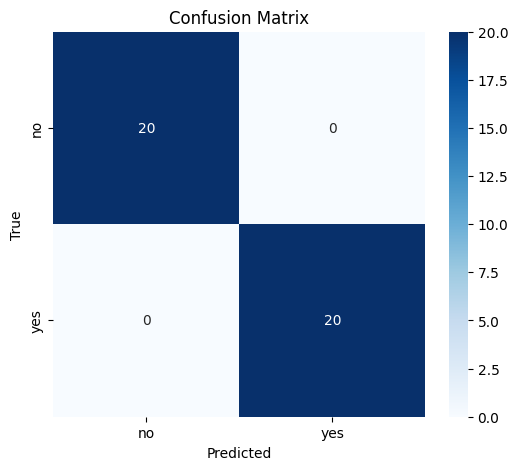


Classification Report:
              precision    recall  f1-score   support

          no       1.00      1.00      1.00        20
         yes       1.00      1.00      1.00        20

    accuracy                           1.00        40
   macro avg       1.00      1.00      1.00        40
weighted avg       1.00      1.00      1.00        40



In [ ]:
import os
import glob
import numpy as np
from ultralytics import YOLO
from sklearn.metrics import confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns

# -----------------------------------------------------------
# CONFIG
# -----------------------------------------------------------
data_dir = "/content/datasets/cheeto_cut_dataset"
model_path = "cls_runs/yolov8m_cheeto_cut_dataset/weights/best.pt"

# Class names in correct order
class_names = ["no", "yes"]

# Load model
model = YOLO(model_path)

# -----------------------------------------------------------
# COLLECT ALL TEST IMAGES
# -----------------------------------------------------------
test_images_no = glob.glob(f"{data_dir}/test/no/*.*")
test_images_yes = glob.glob(f"{data_dir}/test/yes/*.*")

print(f"Found {len(test_images_no)} 'no' images")
print(f"Found {len(test_images_yes)} 'yes' images")

all_images = test_images_no + test_images_yes
true_labels = [0] * len(test_images_no) + [1] * len(test_images_yes)

# -----------------------------------------------------------
# RUN PREDICTION ON EACH IMAGE
# -----------------------------------------------------------
pred_labels = []

for img in all_images:
    result = model.predict(img, imgsz=224, verbose=False)[0]
    pred_class = int(result.probs.top1)  # predicted class index
    pred_labels.append(pred_class)

# -----------------------------------------------------------
# CONFUSION MATRIX
# -----------------------------------------------------------
cm = confusion_matrix(true_labels, pred_labels)

print("\nConfusion Matrix:")
print(cm)

# Display pretty confusion matrix
plt.figure(figsize=(6,5))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
            xticklabels=class_names, yticklabels=class_names)
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Confusion Matrix")
plt.show()

# -----------------------------------------------------------
# CLASSIFICATION REPORT
# -----------------------------------------------------------
print("\nClassification Report:")
print(classification_report(true_labels, pred_labels, target_names=class_names))


# Copy Best Model Back to Drive

In [ ]:
import shutil, os
best_model_path = "cls_runs/yolov8m_cheeto_cut_dataset/weights/best.pt"
drive_save_dir = "/content/drive/MyDrive/rl/yolov8_models/cheeto_cut"
os.makedirs(drive_save_dir, exist_ok=True)
shutil.copy(best_model_path, drive_save_dir)
print("Saved to:", drive_save_dir)

Saved to: /content/drive/MyDrive/rl/yolov8_models/cheeto_cut
